<h1>Lab2</h1>

<h2><b>Negative image</b></h2>

<h3>Load opencv and plot modules</h3>

In [1]:
import cv2
import matplotlib.pyplot as plt

<h3>Read sample image</h3>

In [2]:
in_img = cv2.imread("./examples/Fig0304.tif")

*By default OpenCV load image in BGR format.

In [3]:
img_rgb = cv2.cvtColor(in_img, cv2.COLOR_BGR2RGB)

In [4]:
img_gray = cv2.cvtColor(in_img, cv2.COLOR_BGR2GRAY)
plt.gray()

<Figure size 432x288 with 0 Axes>

<h3>Plot input sample image</h3>

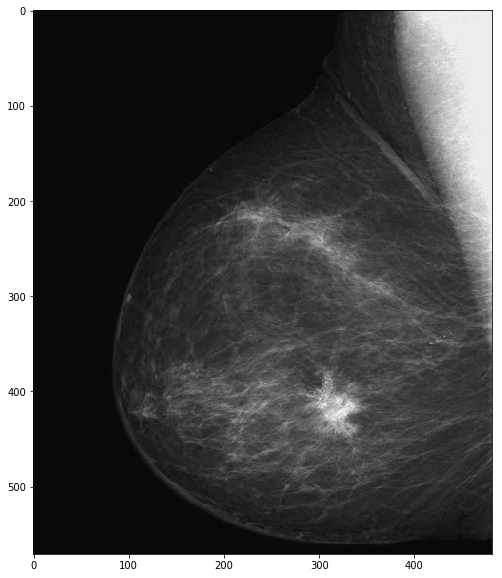

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(img_gray, cmap = 'gray'); plt.show();

<h3>Getting image parametrs</h3>


In [6]:
height = img_rgb.shape[0] 
width = img_rgb.shape[1]

<h3>Creating copy image for negative</h3>

In [7]:
neg_img = img_rgb.copy()

<h3><i>Fist approach: </i>loop with variable parameters<h3>

In [8]:
for row in range(height):
    for col in range(width):
        neg = 255 - img_gray[row][col]
        neg_img[row][col] = neg

<h3>Plot negative sample image</h3>

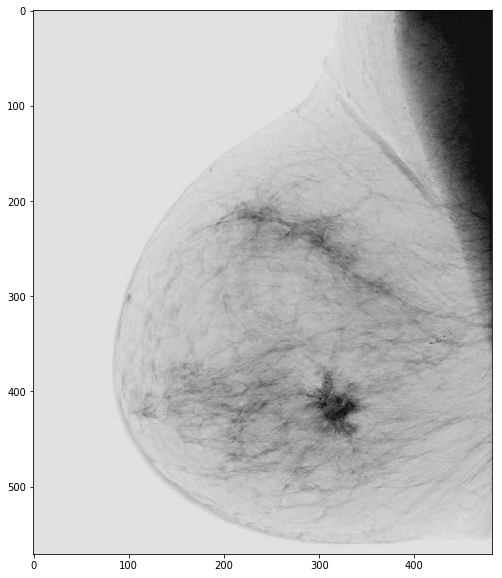

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(neg_img); plt.show();

<h3><i>Second approach: </i>whole image processing<h3>

In [10]:
neg_img1 = 255 - img_gray

<h3>Plot negative sample image</h3>

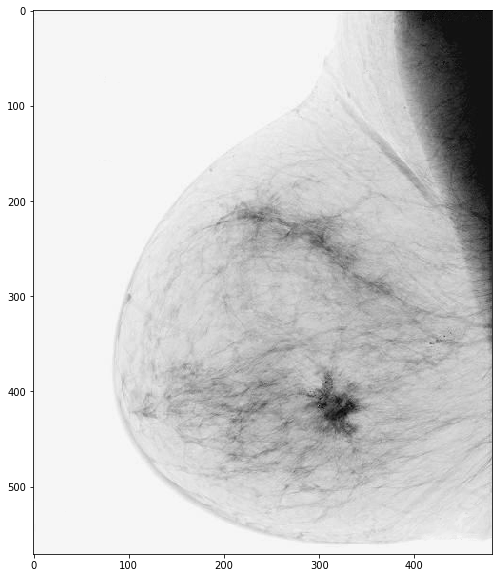

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(neg_img1); plt.show();

<h2><b>Contrast enhancement</b></h2>

<h3>Load PIL and pylab modules</h3>

In [12]:
from PIL import Image, ImageEnhance
from pylab import array, plot, show, axis, arange, figure, uint8
import numpy as np

<h3><i>First approach: </i>whole image processing with PIL module<h3>

<h3>Read sample image</h3>

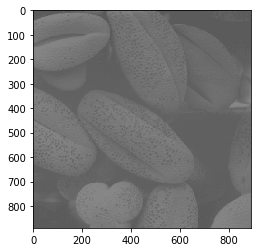

In [26]:
img = Image.open("./examples/Fig0310b.tiff")
plt.imshow(img); plt.show();

<h3>Contrast enhancement</h3>

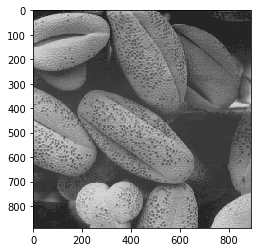

In [27]:
enhancer = ImageEnhance.Contrast(img)
enhanced_im = enhancer.enhance(4.0)
plt.imshow(enhanced_im); plt.show();

<h3><i>Second approach: </i>variable parametrs<h3>

<h3>Setting parametrs</h3>

In [50]:
img = cv2.imread('./examples/Fig0310b.tiff', 0)
alpha = 1.0 # Simple contrast control
beta = 5    # Simple brightness control
contr_img = np.zeros(img.shape, img.dtype)

<h3>Contrast enhancement</h3>

In [51]:
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        contr_img[y,x] = np.clip(alpha*img[y,x] + beta, 0, 255)

<h3>Plot contrast enhancement sample image</h3>

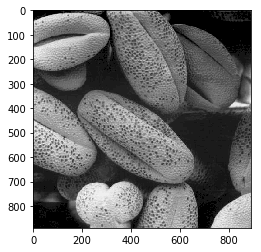

In [52]:
plt.imshow(contr_img); plt.show();

<h2><b>Gamma transformation</b></h2>

<h3>Setting parametrs</h3>

<h3>Load numpy module</h3>

In [53]:
import numpy as np

<h3>Read sample image</h3>

In [54]:
in_img_grayscale = cv2.imread("./examples/Fig0308a.tif", 0)

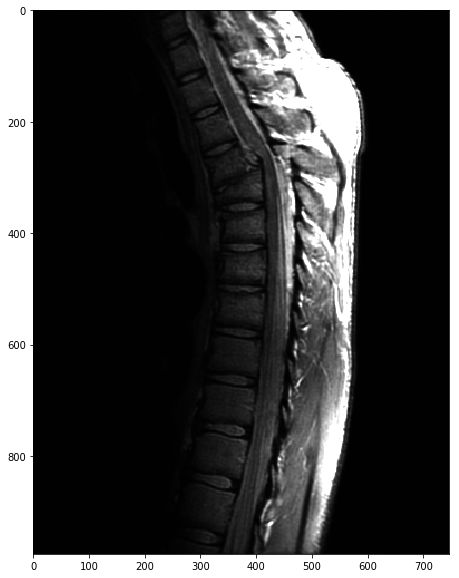

In [55]:
plt.figure(figsize=(10,10))
plt.imshow(in_img_grayscale, cmap = 'gray'); plt.show();

<h4>First Gamma correction</h4>

In [56]:
gamma = 0.6
img2 = np.power(in_img_grayscale, gamma)

<h4>Second Gamma correction</h4>

In [57]:
gamma = 0.4
img3 = np.power(in_img_grayscale, gamma)

<h4>Third Gamma correction</h4>

In [58]:
gamma = 0.3
img4 = np.power(in_img_grayscale, gamma)

<h3>Plot gamma corrected sample image</h3>

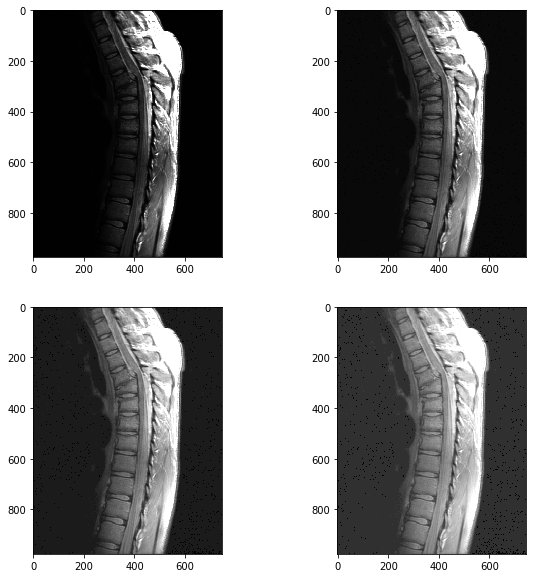

In [59]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(in_img_grayscale, cmap = 'gray'); 
plt.subplot(222)
plt.imshow(img2, cmap='gray');
plt.subplot(223)
plt.imshow(img3, cmap='gray'); 
plt.subplot(224)
plt.imshow(img4, cmap='gray'); plt.show();

<h2>Histogram Equalization</h2>

<h3>Getting histogram</h3>

In [73]:
img = cv2.imread('./examples/Fig0310b.tiff')
hist,bins = np.histogram(img.ravel(),256,[0,256])

<h3>Plot histogram</h3>

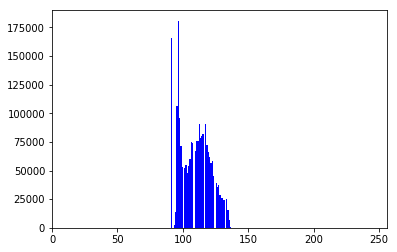

In [74]:
plt.hist(img.ravel(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.show()

<h3>Histogram Equalization</h3>

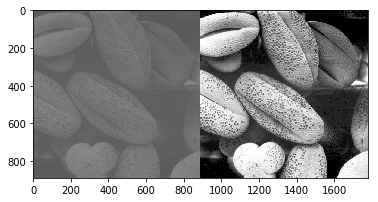

In [76]:
img = cv2.imread('./examples/Fig0310b.tiff', 0)

equ = cv2.equalizeHist(img)
res = np.hstack((img, equ)) 
plt.imshow(res, cmap='gray'); plt.show();